### Importing Libraries 

In [57]:
import numpy as np
import pandas as pd
import shapefile as shp
import functions as f
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Reading shapefile

In [58]:
fp = 'Data/INDIA.shp'

In [59]:
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head(3)

,ST_NAME,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12..."
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431..."
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624..."


In [60]:
# Displaying the map 

<AxesSubplot:>

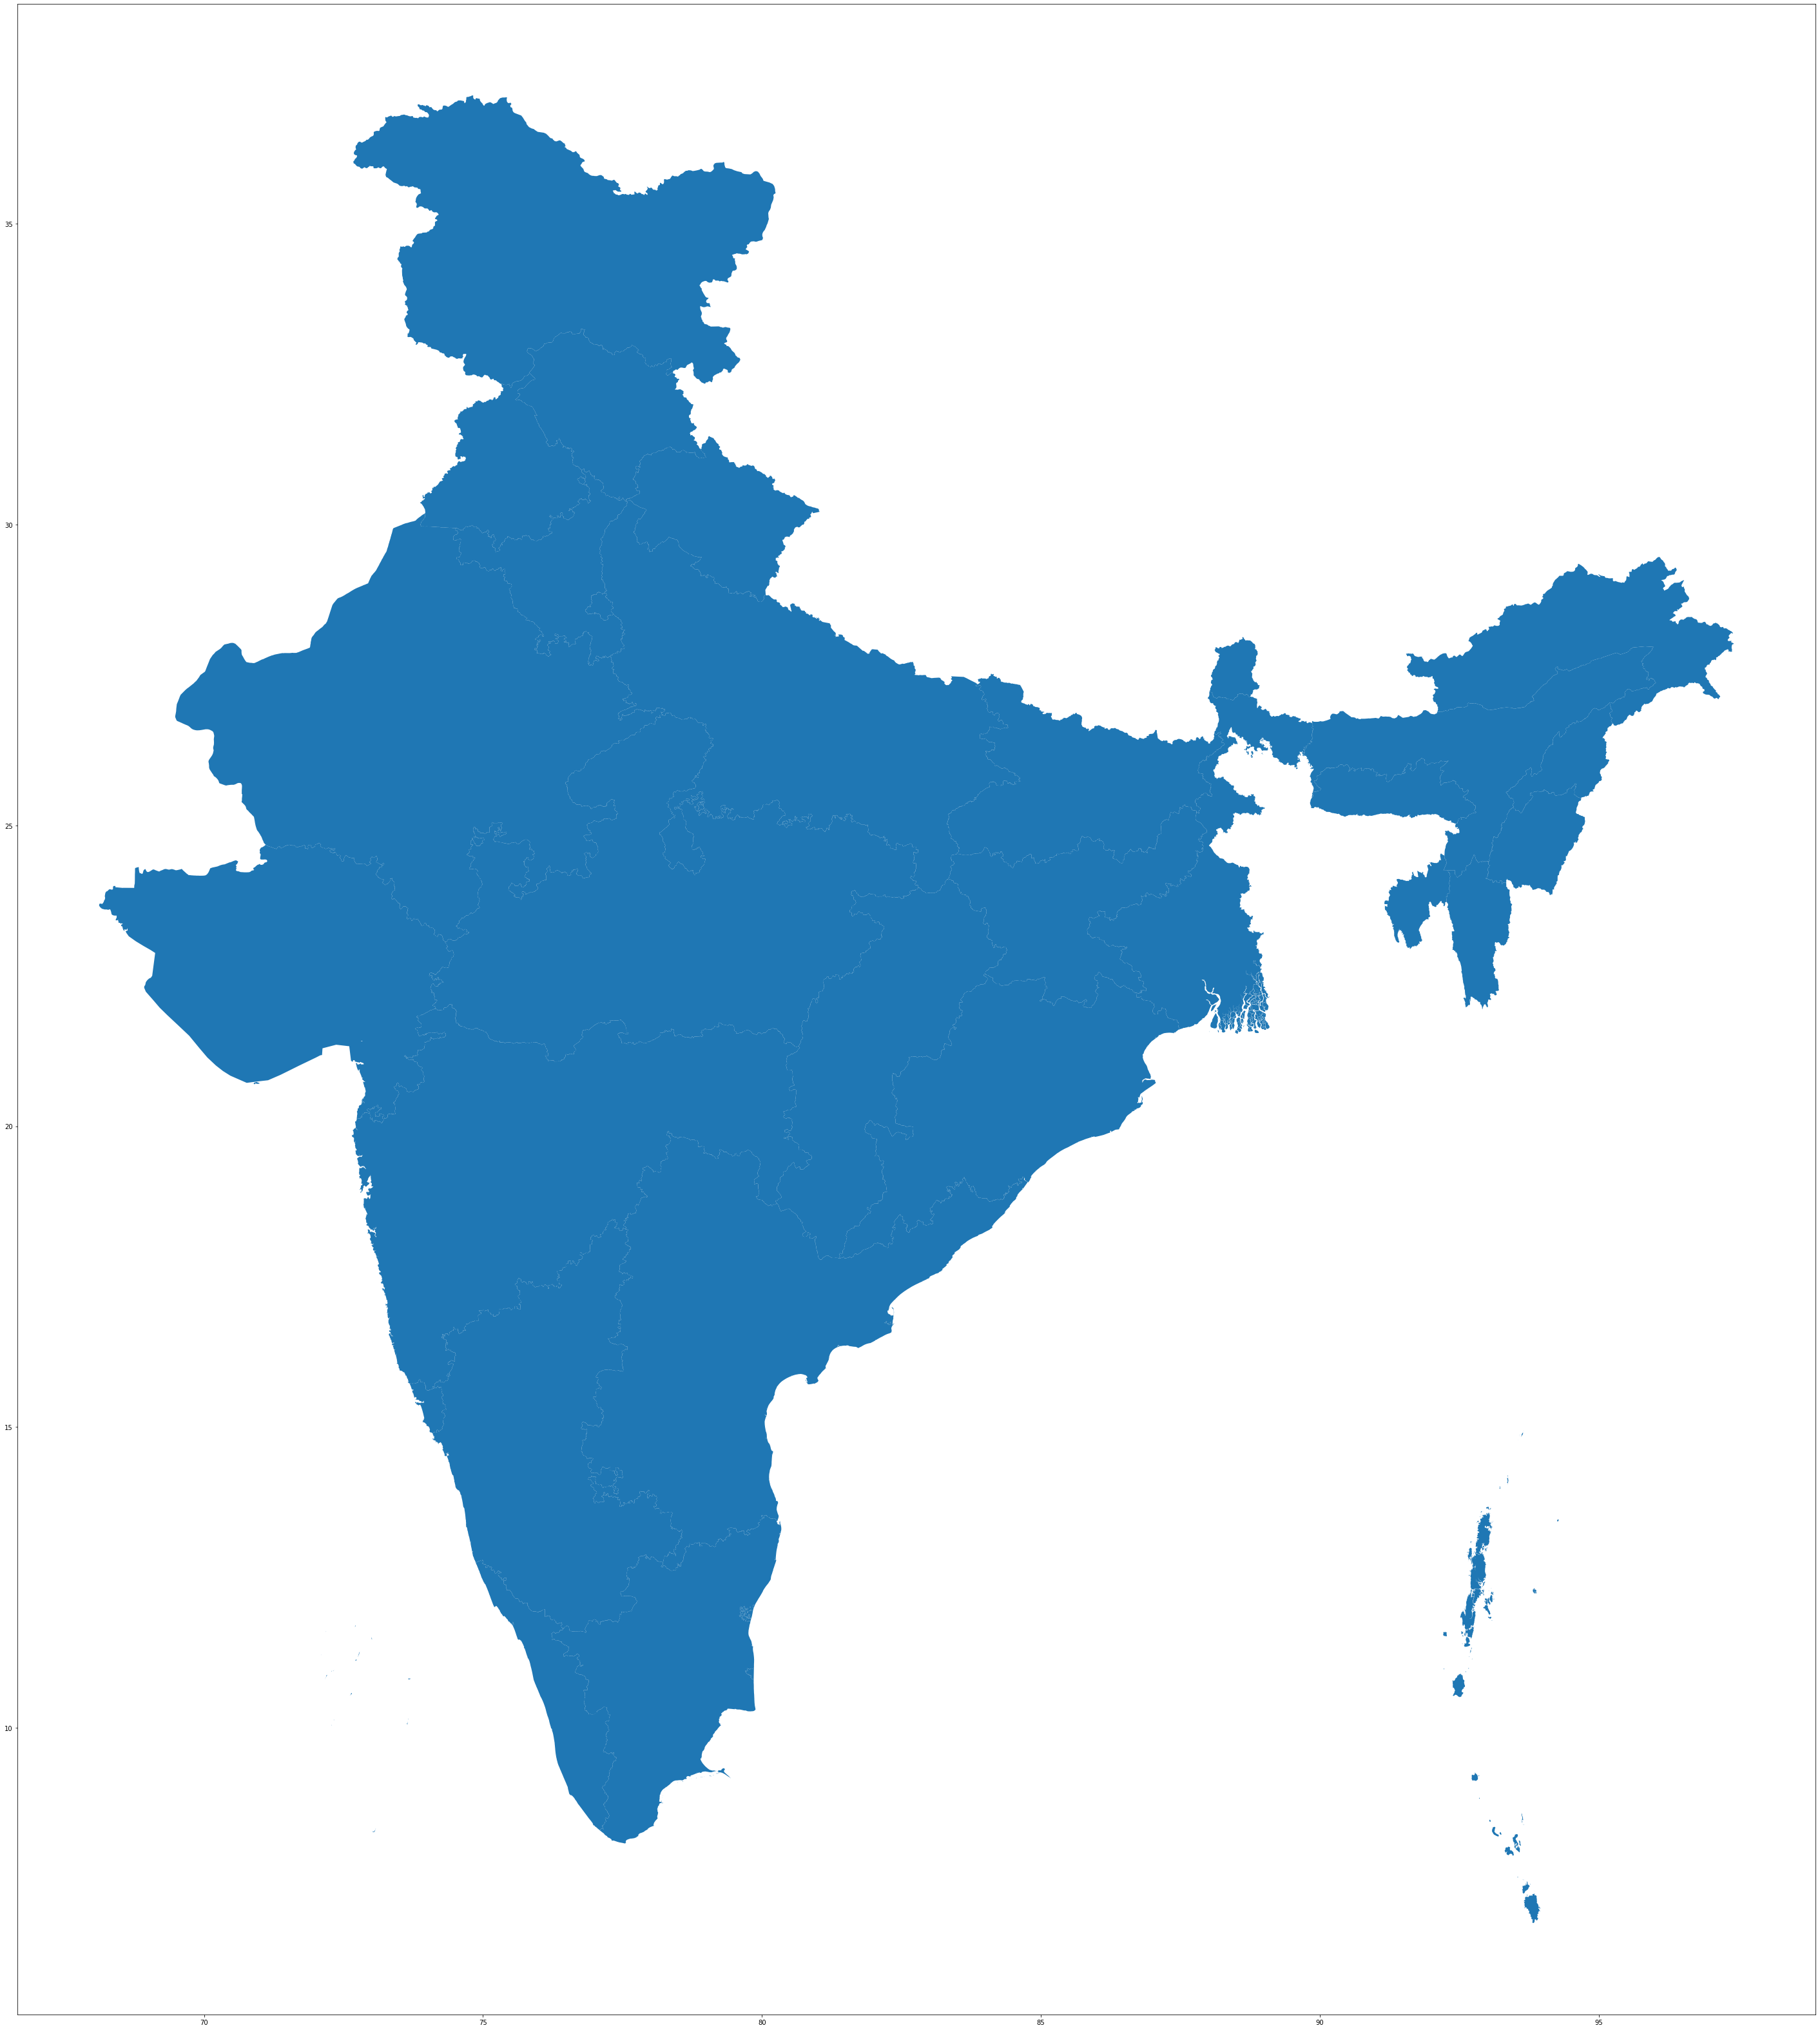

In [61]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()

In [62]:
# Reading statewise data of total doses administered 

In [63]:
df = pd.read_csv('Data/data_state.csv')
df.head(3)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0


In [64]:
# Cleaning the data by dropping unnecessary rows

In [65]:
df = df.set_index(['State'])
df = df.drop(['India'], axis = 0)
df = df.reset_index()

In [66]:
df.head(5)

,State,Updated On,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,Andaman and Nicobar Islands,16/01/2021,23.0,2.0,2.0,23.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,0.0
1,Andaman and Nicobar Islands,17/01/2021,23.0,2.0,2.0,23.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,0.0
2,Andaman and Nicobar Islands,18/01/2021,42.0,9.0,2.0,42.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,13.0,0.0
3,Andaman and Nicobar Islands,19/01/2021,89.0,12.0,2.0,89.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,36.0,0.0
4,Andaman and Nicobar Islands,20/01/2021,124.0,16.0,3.0,124.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,57.0,0.0


In [67]:
# Reading in data about statewise ruling parties

In [68]:
ruling_parties = pd.read_csv('Data/ruling_parties.csv')
ruling_parties.head(1)

,S.No.,State / Union Territory,Government,Gvt
0,1,Andhra Pradesh,Other,YSRCP


In [69]:
# Cleaning the data by dropping unnecessary rows and renaming state names

In [70]:
ruling_parties = ruling_parties.drop(columns = ['S.No.'])
ruling_parties['State / Union Territory'] = ruling_parties['State / Union Territory'].replace({'Jammu and Kashmir[2]':'Jammu and Kashmir'})
ruling_parties = ruling_parties.rename(columns = {'State / Union Territory' : 'State'})
ruling_parties = ruling_parties.set_index(['State'])
ruling_parties

,Government,Gvt
State,,
Andhra Pradesh,Other,YSRCP
Arunachal Pradesh,Alliance,BJP+NPP[1]
Assam,Alliance,BJP+AGP+UPPL+BPF
Bihar,Alliance,BJP+JD(U)+HAM
Chhattisgarh,Other,INC
Delhi,Other,AAP
Goa,Alliance,BJP+MGP
Gujarat,Same as Center,BJP
Haryana,Alliance,BJP+JJP+HLP


In [71]:
# Grouping total doses administered for each state 

In [72]:
doses_by_state = df.groupby(by = 'State', as_index = False).sum()
doses_by_state
doses_by_state = doses_by_state.set_index('State')
doses_by_state = doses_by_state.sort_values(by = 'First Dose Administered')

In [73]:
s = doses_by_state.reset_index()

In [74]:
s.head()

,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,Lakshadweep,9543872.0,1283856.0,2757.0,7070067.0,2473805.0,3778953.0,3161515.0,460.0,75.0,...,504.0,3426900.0,2258554.0,1255474.0,591777.0,925093.0,528243.0,1215081.0,909442.0,192.0
1,Ladakh,38600907.0,964479.0,6032.0,27788523.0,10812384.0,14856825.0,11682776.0,2826.0,910.0,...,777.0,14459767.0,6752788.0,5329872.0,3240510.0,3040285.0,2759736.0,5156509.0,4308849.0,931.0
2,Andaman and Nicobar Islands,39677462.0,1234591.0,5651.0,29712879.0,9964583.0,16265045.0,14182473.0,4061.0,0.0,...,615.0,13088629.0,11590679.0,5772271.0,1223324.0,4376537.0,2243271.0,4387523.0,3713987.0,615.0
3,Sikkim,84174958.0,2215366.0,8807.0,62913996.0,21260962.0,34834059.0,29120130.0,21426.0,3239.0,...,47362.0,36235891.0,17548673.0,10191051.0,3557099.0,7119614.0,4728829.0,8693029.0,7440996.0,2727.0
4,Dadra and Nagar Haveli and Daman and Diu,78662594.0,5094186.0,14254.0,65736042.0,12926552.0,43600096.0,21625886.0,13489.0,3504.0,...,20499.0,47353280.0,13476940.0,4409251.0,5253085.0,4123599.0,1741440.0,7232714.0,4406202.0,1445.0


In [75]:
df_by_state = s[['State','Total Doses Administered']]

In [76]:
df_by_state

,State,Total Doses Administered
0,Lakshadweep,9.543872e+06
1,Ladakh,3.860091e+07
2,Andaman and Nicobar Islands,3.967746e+07
3,Sikkim,8.417496e+07
4,Dadra and Nagar Haveli and Daman and Diu,7.866259e+07
5,Puducherry,9.362830e+07
6,Nagaland,9.731561e+07
7,Mizoram,1.068867e+08
8,Arunachal Pradesh,1.119049e+08
9,Chandigarh,1.148845e+08


In [77]:
#Cleaning data and renaming column names to maintain consistency 

In [78]:
map_df['ST_NAME'] = map_df['ST_NAME'].str.replace('ANDAMAN AND NICOBAR ISLANDS', 'Andaman and Nicobar Islands')
map_df['ST_NAME'] = map_df['ST_NAME'].str.replace('CHANDIGARH', 'Chandigarh')
map_df['ST_NAME'] = map_df['ST_NAME'].str.replace('Jammu And Kashmir', 'Jammu and Kashmir')
map_df['ST_NAME'] = map_df['ST_NAME'].str.replace('LAKSHADWEEP', 'Lakshadweep')
map_df['ST_NAME'] = map_df['ST_NAME'].str.replace('Nct Of Delhi', 'Delhi')
map_df['ST_NAME'] = map_df['ST_NAME'].str.replace('Orissa', 'Odisha')
map_df['ST_NAME'] = map_df['ST_NAME'].str.replace('Pondicherry', 'Puducherry')

## Merge data set with shape file

In [79]:
merged = map_df.merge(df_by_state, how='left', left_on="ST_NAME", right_on="State")

In [80]:
merged.head(1)

,ST_NAME,geometry,State,Total Doses Administered
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12...",Andaman and Nicobar Islands,39677462.0


In [81]:
new_merged = merged.merge(ruling_parties, how='left', left_on="ST_NAME", right_on="State")
new_merged.head(1)

,ST_NAME,geometry,State,Total Doses Administered,Government,Gvt
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((92.89889 12.91583, 92.89917 12...",Andaman and Nicobar Islands,39677462.0,NaN,NaN


In [82]:
state_data = new_merged.dropna()
state_data.dtypes

ST_NAME                       object
geometry                    geometry
State                         object
Total Doses Administered     float64
Government                    object
Gvt                           object
dtype: object

## Create a map with the fill indicating the number of vaccine doses administered 

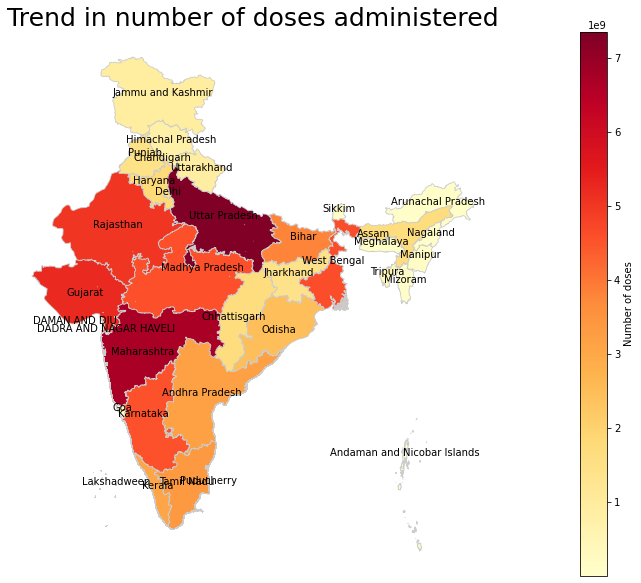

In [84]:
# set the value column that will be visualised
variable = 'Total Doses Administered'

# set the range for the choropleth values
# vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')

# add a title 
ax.set_title('Trend in number of doses administered', fontdict={'fontsize': '25', 'fontweight' : '3'})


# # Create colorbar legend
# sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# # empty array for the data range
# sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# # add the colorbar to the figure
# fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True, legend_kwds={'label': "Number of doses"})

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(text=row['ST_NAME'], xy=row['coords'],horizontalalignment='center')
    
    

In [85]:
df_display = state_data.copy(deep=False)

In [86]:
df_display['Total Doses Administered'] = df_display['Total Doses Administered'].apply(f.human_format)
df_display

,ST_NAME,geometry,State,Total Doses Administered,Government,Gvt
1,Andhra Pradesh,"POLYGON ((83.94319 18.21431, 83.94236 18.21431...",Andhra Pradesh,3.20G,Other,YSRCP
2,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",Arunachal Pradesh,111.90M,Alliance,BJP+NPP[1]
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",Assam,1.66G,Alliance,BJP+AGP+UPPL+BPF
4,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",Bihar,3.81G,Alliance,BJP+JD(U)+HAM
6,Chhattisgarh,"POLYGON ((83.79799 22.28996, 83.79752 22.28949...",Chhattisgarh,1.69G,Other,INC
9,Goa,"POLYGON ((74.26171 14.99076, 74.26330 14.98899...",Goa,175.20M,Alliance,BJP+MGP
10,Gujarat,"POLYGON ((74.06675 22.55090, 74.05628 22.54778...",Gujarat,5.23G,Same as Center,BJP
11,Haryana,"POLYGON ((77.36850 30.09156, 77.35698 30.08415...",Haryana,1.81G,Alliance,BJP+JJP+HLP
12,Himachal Pradesh,"POLYGON ((77.88749 31.15470, 77.88971 31.14897...",Himachal Pradesh,762.57M,Same as Center,BJP
13,Jammu and Kashmir,"POLYGON ((76.75757 33.24312, 76.76236 33.23954...",Jammu and Kashmir,933.01M,Other,President's Rule


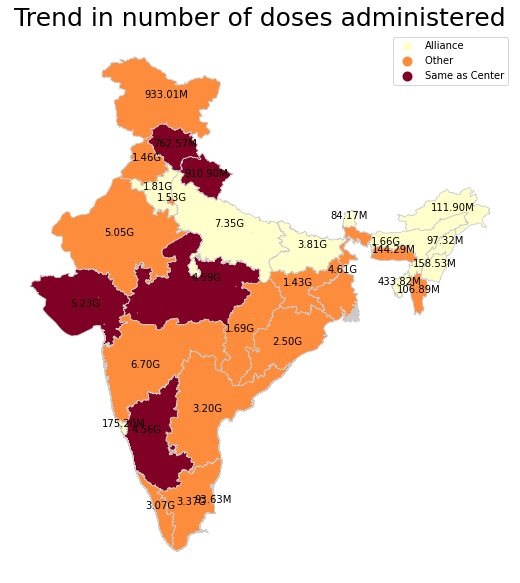

In [87]:
# set the value column that will be visualised
variable = 'Government'

# set the range for the choropleth values
# vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')

# add a title 
ax.set_title('Trend in number of doses administered', fontdict={'fontsize': '25', 'fontweight' : '3'})


# # Create colorbar legend
# sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# # empty array for the data range
# sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# # add the colorbar to the figure
# fig.colorbar(sm)

# create map
df_display.plot(column=variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

# Add Labels
df_display['coords'] = df_display['geometry'].apply(lambda x: x.representative_point().coords[:])
df_display['coords'] = [coords[0] for coords in df_display['coords']]

for idx, row in df_display.iterrows():
    plt.annotate(text=row['Total Doses Administered'], xy=row['coords'],horizontalalignment='center')
    


In [88]:
# Displaying data in bar grapgh format

In [89]:
new_data= state_data.sort_values(by = ['Government', 'Total Doses Administered'], axis=0, ascending=[True, False], inplace=False,
               kind='quicksort', na_position='first', ignore_index=True, key=None)
new_data

,ST_NAME,geometry,State,Total Doses Administered,Government,Gvt
0,Uttar Pradesh,"POLYGON ((84.35441 25.74362, 84.33749 25.74513...",Uttar Pradesh,7.352917e+09,Alliance,BJP+AD(S)+NISHAD
1,Bihar,"POLYGON ((87.95561 25.53805, 87.95239 25.53646...",Bihar,3.809949e+09,Alliance,BJP+JD(U)+HAM
2,Haryana,"POLYGON ((77.36850 30.09156, 77.35698 30.08415...",Haryana,1.806587e+09,Alliance,BJP+JJP+HLP
3,Assam,"POLYGON ((95.59917 27.22961, 95.59009 27.22952...",Assam,1.660918e+09,Alliance,BJP+AGP+UPPL+BPF
4,Tripura,"POLYGON ((92.25940 23.81499, 92.26065 23.80708...",Tripura,4.338228e+08,Alliance,BJP+IPFT
5,Goa,"POLYGON ((74.26171 14.99076, 74.26330 14.98899...",Goa,1.752044e+08,Alliance,BJP+MGP
6,Manipur,"POLYGON ((94.74221 25.02525, 94.73946 25.02049...",Manipur,1.585337e+08,Alliance,BJP+NPP+JD(U)+NPF+KPA
7,Arunachal Pradesh,"POLYGON ((94.86086 27.73948, 94.86603 27.73624...",Arunachal Pradesh,1.119049e+08,Alliance,BJP+NPP[1]
8,Nagaland,"POLYGON ((95.21614 26.73532, 95.22820 26.72385...",Nagaland,9.731561e+07,Alliance,NDPP+NPF+BJP
9,Puducherry,"MULTIPOLYGON (((79.83148 11.91229, 79.82942 11...",Puducherry,9.362830e+07,Alliance,AINRC+BJP


<AxesSubplot:xlabel='Total Doses Administered', ylabel='State'>

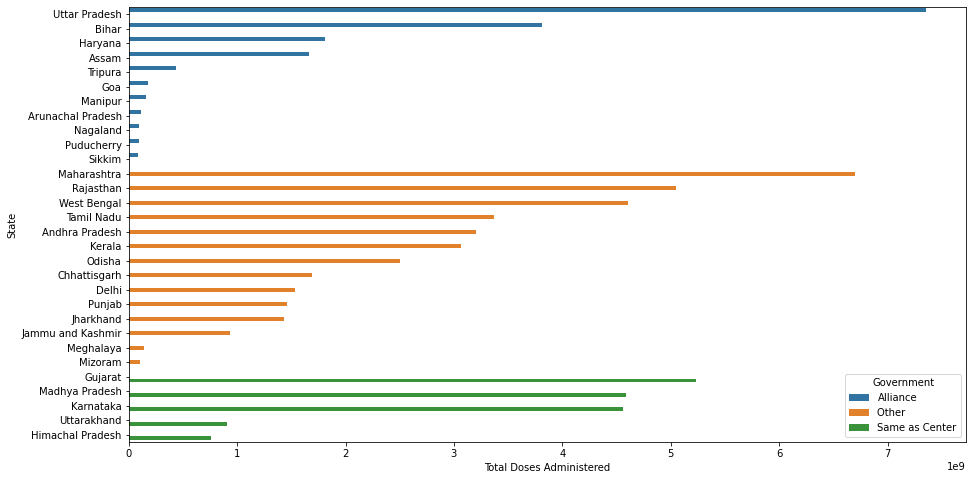

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(data=new_data, y='State', x='Total Doses Administered',hue= 'Government')

In [91]:
# The bar plot shows no significant trends

In [92]:
same_as_central= f.human_format( (new_data[new_data['Government'] == 'Alliance']['Total Doses Administered'].sum()) + 
                              (new_data[new_data['Government'] == 'Same as Center']['Total Doses Administered'].sum()))


same_as_central

'31.84G'

In [93]:
other = f.human_format(new_data[new_data['Government'] == 'Other ']['Total Doses Administered'].sum())
other

'35.79G'

## Total doses administered where ruling party of state is not same as central gov are 35.79G
## Total doses administered where ruling party of state is same as central government are 31.84G

In [94]:
#Analyzing total doses administered for each state using bar graphs
new_data= new_data.sort_values(by = ['Total Doses Administered'], axis=0, ascending=[False], inplace=False,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

<AxesSubplot:xlabel='State'>

<Figure size 1080x576 with 0 Axes>

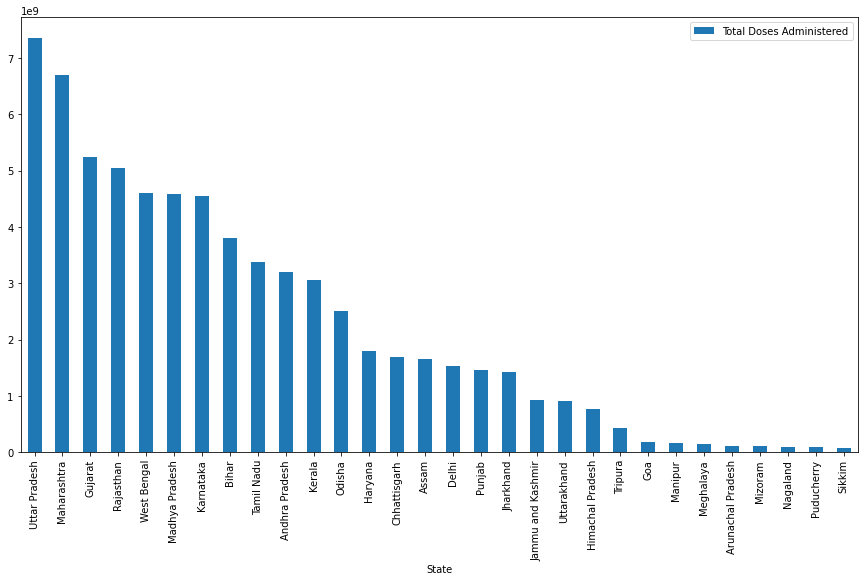

In [95]:
plt.figure(figsize=(15,8))
new_data.plot(x='State', y='Total Doses Administered',kind='bar',figsize=(15,8))